In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd

%matplotlib inline

In [2]:
df_airline=pd.read_csv('air_passengers.csv')
df_airline.head()

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [4]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [5]:
df_airline.dropna(axis=0,inplace=True)

In [6]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [7]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Month                    144 non-null    object
 1   Thousands of Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.4+ KB


In [8]:
df_airline['Month']=pd.to_datetime(df_airline['Month'])

In [9]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.4 KB


In [10]:
df_airline.set_index('Month',inplace=True)

In [11]:
df_airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<AxesSubplot:xlabel='Month'>

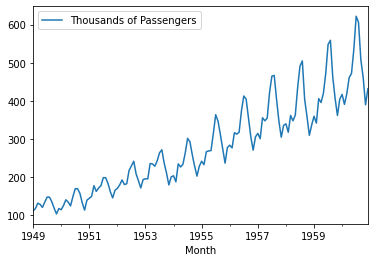

In [12]:
df_airline.plot()

In [13]:
from statsmodels.tsa.stattools import adfuller

In [14]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [15]:
adf_test(df_airline['Thousands of Passengers'])

ADF Statistics: 0.8153688792060348
p- value: 0.9918802434376408
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [16]:
## Use Techniques Differencing
df_airline['Passengers First Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(1)

In [17]:
df_airline.head()

,Thousands of Passengers,Passengers First Difference
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0


In [18]:
adf_test(df_airline['Passengers First Difference'].dropna())

ADF Statistics: -2.829266824169994
p- value: 0.05421329028382626
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [19]:
## Use Techniques Differencing
df_airline['Passengers Second Difference']=df_airline['Passengers First Difference']-df_airline['Passengers First Difference'].shift(1)

In [20]:
adf_test(df_airline['Passengers Second Difference'].dropna())

ADF Statistics: -16.384231542468516
p- value: 2.7328918500141235e-29
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [21]:
### 12 months 
## Use Techniques Differencing
df_airline['Passengers 12 Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(12)

In [22]:
adf_test(df_airline['Passengers 12 Difference'].dropna())

ADF Statistics: -3.3830207264924796
p- value: 0.011551493085515008
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [23]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

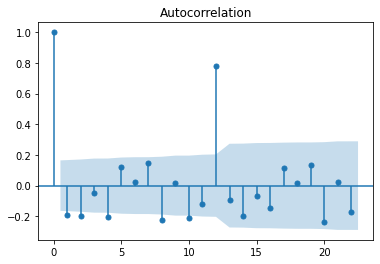

In [24]:
acf = plot_acf(df_airline["Passengers Second Difference"].dropna())

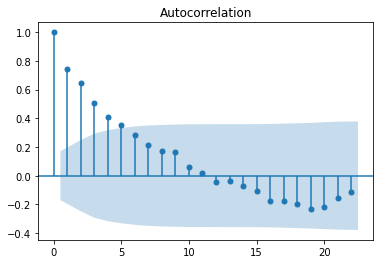

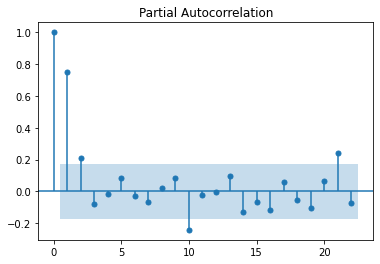

In [25]:
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

C:\Users\HP\anaconda3\envs\myenv\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


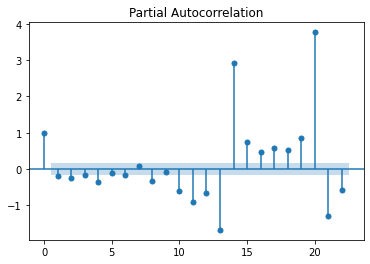

In [26]:
result = plot_pacf(df_airline["Passengers Second Difference"].dropna())

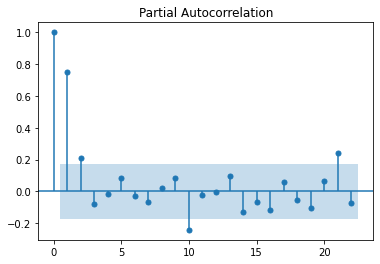

In [27]:
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

In [28]:
### split train and test data
df_airline

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606,-16.0,-103.0,47.0
1960-09-01,508,-98.0,-82.0,45.0
1960-10-01,461,-47.0,51.0,54.0


In [29]:
from datetime import datetime,timedelta
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)

In [30]:
train_data=df_airline[:train_dataset_end]
test_data=df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]

In [31]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [32]:


test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284,6.0,-35.0,42.0
1956-02-01,277,-7.0,-13.0,44.0
1956-03-01,317,40.0,47.0,50.0
1956-04-01,313,-4.0,-44.0,44.0
1956-05-01,318,5.0,9.0,48.0
1956-06-01,374,56.0,51.0,59.0
1956-07-01,413,39.0,-17.0,49.0
1956-08-01,405,-8.0,-47.0,58.0
1956-09-01,355,-50.0,-42.0,43.0


In [33]:
## create a ARIMA model
from statsmodels.tsa.arima_model import ARIMA

In [34]:


train_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347,-17.0,-66.0,54.0
1955-09-01,312,-35.0,-18.0,53.0
1955-10-01,274,-38.0,-3.0,45.0


In [38]:
model_ARIMA=ARIMA(train_data['Thousands of Passengers'],order=(10,2,0))

C:\Users\HP\anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\HP\anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred

In [39]:


model_Arima_fit=model_ARIMA.fit()



In [40]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ARIMA Model Results                                  
======================================================================================
Dep. Variable:     D2.Thousands of Passengers   No. Observations:                   82
Model:                        ARIMA(10, 2, 0)   Log Likelihood                -357.239
Method:                               css-mle   S.D. of innovations             18.333
Date:                        Mon, 18 Apr 2022   AIC                            738.477
Time:                                09:23:19   BIC                            767.358
Sample:                            03-01-1949   HQIC                           750.072
                                 - 12-01-1955                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 0.0164      0.347      0.047      0.962      -0.665       0.697
ar.L1.D2.Thousands of Passengers     -0.5165      0.097     -5.300      0.000      -0.707      -0.325
ar.L2.D2.Thousands of Passengers     -0.7203      0.108     -6.650      0.000      -0.933      -0.508
ar.L3.D2.Thousands of Passengers     -0.4856      0.120     -4.032      0.000      -0.722      -0.250
ar.L4.D2.Thousands of Passengers     -0.7506      0.131     -5.717      0.000      -1.008      -0.493
ar.L5.D2.Thousands of Passengers     -0.5065      0.151     -3.360      0.001      -0.802      -0.211
ar.L6.D2.Thousands of Passengers     -0.5204      0.149     -3.500      0.000      -0.812      -0.229
ar.L7.D2.Thousands of Passengers     -0.3055      0.136     -2.250      0.024      -0.572      -0.039
ar.L8.D2.Thousands of Passengers     -0.5943      0.125     -4.744      0.000      -0.840      -0.349
ar.L9.D2.Thousands of Passengers     -0.2966      0.116     -2.556      0.011      -0.524      -0.069
ar.L10.D2.Thousands of Passengers    -0.4826      0.101     -4.765      0.000      -0.681      -0.284
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             0.9098           -0.5670j            1.0720           -0.0887
AR.2             0.9098           +0.5670j            1.0720            0.0887
AR.3             0.4844           -0.9210j            1.0406           -0.1729
AR.4             0.4844           +0.9210j            1.0406            0.1729
AR.5            -0.9676           -0.4146j            1.0527           -0.4356
AR.6            -0.9676           +0.4146j            1.0527            0.4356
AR.7            -0.6004           -0.8889j            1.0726           -0.3445
AR.8            -0.6004           +0.8889j            1.0726            0.3445
AR.9            -0.1335           -1.1349j            1.1427           -0.2686
AR.10           -0.1335           +1.1349j            1.1427            0.2686
------------------------------------------------------------------------------
"""

In [ ]:
#P>|Z| has positive impact on the time stamp lag because they are less than 0.05

In [41]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284,6.0,-35.0,42.0
1956-02-01,277,-7.0,-13.0,44.0
1956-03-01,317,40.0,47.0,50.0
1956-04-01,313,-4.0,-44.0,44.0
1956-05-01,318,5.0,9.0,48.0
1956-06-01,374,56.0,51.0,59.0
1956-07-01,413,39.0,-17.0,49.0
1956-08-01,405,-8.0,-47.0,58.0
1956-09-01,355,-50.0,-42.0,43.0


In [42]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [43]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Thousands of Passengers']-pred

C:\Users\HP\anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [44]:
pred

1956-01-01   -18.695969
1956-02-01   -12.830812
1956-03-01    -2.329702
1956-04-01   -15.562145
1956-05-01    19.310707
1956-06-01    19.647918
1956-07-01   -13.271430
1956-08-01   -36.529660
1956-09-01     4.998648
1956-10-01    -9.913202
1956-11-01    28.288504
1956-12-01    24.352197
1957-01-01   -18.119968
1957-02-01    -3.741496
1957-03-01   -11.652397
1957-04-01     4.801888
1957-05-01    11.674261
1957-06-01     8.980671
1957-07-01   -18.932093
1957-08-01   -10.557351
1957-09-01     0.734729
1957-10-01     0.773642
1957-11-01    23.197653
1957-12-01    -1.112077
1958-01-01    -7.244804
1958-02-01    -7.413889
1958-03-01    -2.318074
1958-04-01     6.169916
1958-05-01     7.709338
1958-06-01    -0.056464
1958-07-01   -13.184616
1958-08-01    -0.771359
1958-09-01    -1.976036
1958-10-01     8.806788
1958-11-01     8.451445
1958-12-01    -4.117854
1959-01-01    -4.677816
1959-02-01    -5.031484
1959-03-01     2.660292
1959-04-01     3.850254
1959-05-01     4.913935
1959-06-01    -5

In [45]:
residuals

Month
1956-01-01    302.695969
1956-02-01    289.830812
1956-03-01    319.329702
1956-04-01    328.562145
1956-05-01    298.689293
1956-06-01    354.352082
1956-07-01    426.271430
1956-08-01    441.529660
1956-09-01    350.001352
1956-10-01    315.913202
1956-11-01    242.711496
1956-12-01    281.647803
1957-01-01    333.119968
1957-02-01    304.741496
1957-03-01    367.652397
1957-04-01    343.198112
1957-05-01    343.325739
1957-06-01    413.019329
1957-07-01    483.932093
1957-08-01    477.557351
1957-09-01    403.265271
1957-10-01    346.226358
1957-11-01    281.802347
1957-12-01    337.112077
1958-01-01    347.244804
1958-02-01    325.413889
1958-03-01    364.318074
1958-04-01    341.830084
1958-05-01    355.290662
1958-06-01    435.056464
1958-07-01    504.184616
1958-08-01    505.771359
1958-09-01    405.976036
1958-10-01    350.193212
1958-11-01    301.548555
1958-12-01    341.117854
1959-01-01    364.677816
1959-02-01    347.031484
1959-03-01    403.339708
1959-04-01    392.1

<AxesSubplot:ylabel='Density'>

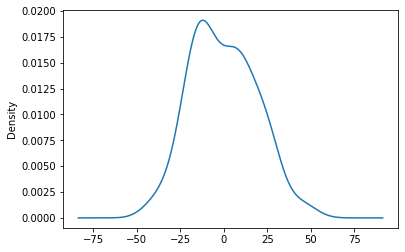

In [46]:
model_Arima_fit.resid.plot(kind='kde')

In [47]:
test_data['Predicted_ARIMA']=pred

C:\Users\HP\AppData\Local\Temp/ipykernel_9400/95659616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


<AxesSubplot:xlabel='Month'>

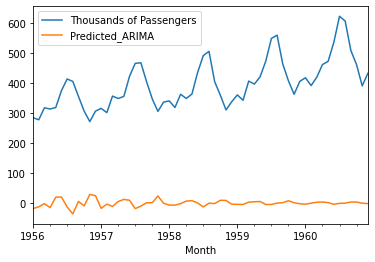

In [48]:
test_data[['Thousands of Passengers','Predicted_ARIMA']].plot()

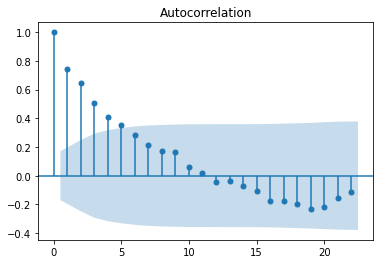

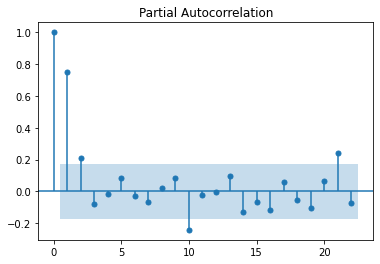

In [49]:
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

In [50]:
## create a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [51]:
model_SARIMA=SARIMAX(train_data['Thousands of Passengers'],order=(3,0,5),seasonal_order=(0,1,0,12))

C:\Users\HP\anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [52]:


model_SARIMA_fit=model_SARIMA.fit()

C:\Users\HP\anaconda3\envs\myenv\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [53]:


model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -265.241
Date:                             Mon, 18 Apr 2022   AIC                            548.481
Time:                                     10:07:48   BIC                            568.971
Sample:                                 01-01-1949   HQIC                           556.638
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5996      0.939      0.639      0.523      -1.241       2.440
ar.L2          0.8314      0.232      3.576      0.000       0.376       1.287
ar.L3         -0.4541      0.895     -0.507      0.612      -2.209       1.301
ma.L1          0.1824      1.171      0.156      0.876      -2.113       2.477
ma.L2         -0.5356      1.270     -0.422      0.673      -3.024       1.953
ma.L3         -0.0985      0.386     -0.255      0.799      -0.856       0.659
ma.L4         -0.1270      0.340     -0.374      0.708      -0.793       0.539
ma.L5          0.2472      0.358      0.690      0.490      -0.455       0.949
sigma2        87.7131     81.790      1.072      0.284     -72.593     248.019
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.68
Prob(Q):                              0.88   Prob(JB):                         0.26
Heteroskedasticity (H):               2.05   Skew:                             0.46
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [54]:


test_data.tail()



,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA
Month,,,,,
1960-08-01,606,-16.0,-103.0,47.0,-0.615669
1960-09-01,508,-98.0,-82.0,45.0,3.106059
1960-10-01,461,-47.0,51.0,54.0,2.964140
1960-11-01,390,-71.0,-24.0,28.0,-0.732255
1960-12-01,432,42.0,113.0,27.0,-2.251380


In [55]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [56]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(1956,6,6),end=datetime(1960,12,1))
residuals=test_data['Thousands of Passengers']-pred_Sarima

C:\Users\HP\anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


<AxesSubplot:xlabel='Month'>

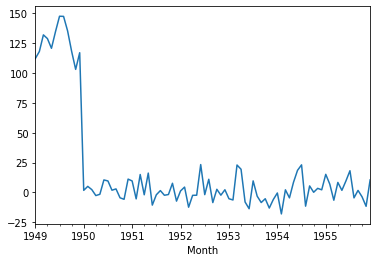

In [57]:


model_SARIMA_fit.resid.plot()



<AxesSubplot:ylabel='Density'>

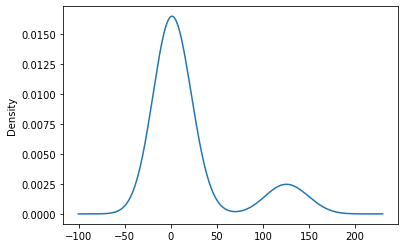

In [58]:


model_SARIMA_fit.resid.plot(kind='kde')



In [59]:


test_data['Predicted_SARIMA']=pred_Sarima



C:\Users\HP\AppData\Local\Temp/ipykernel_9400/3576031378.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=pred_Sarima


In [60]:


test_data



,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA,Predicted_SARIMA
Month,,,,,,
1956-01-01,284,6.0,-35.0,42.0,-18.695969,NaN
1956-02-01,277,-7.0,-13.0,44.0,-12.830812,NaN
1956-03-01,317,40.0,47.0,50.0,-2.329702,NaN
1956-04-01,313,-4.0,-44.0,44.0,-15.562145,NaN
1956-05-01,318,5.0,9.0,48.0,19.310707,NaN
1956-06-01,374,56.0,51.0,59.0,19.647918,NaN
1956-07-01,413,39.0,-17.0,49.0,-13.271430,403.402672
1956-08-01,405,-8.0,-47.0,58.0,-36.529660,385.077459
1956-09-01,355,-50.0,-42.0,43.0,4.998648,349.449796


<AxesSubplot:xlabel='Month'>

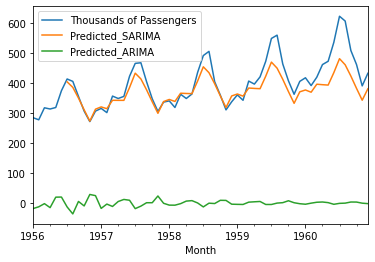

In [61]:
test_data[['Thousands of Passengers','Predicted_SARIMA','Predicted_ARIMA']].plot()

Arima generally doesnt work with seasonal data, but more accurate with stock data